In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<b>Loading Data</b>

In [34]:
train = pd.read_csv('titanic_train.csv')

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<b>Analyse Data</b>

<Axes: >

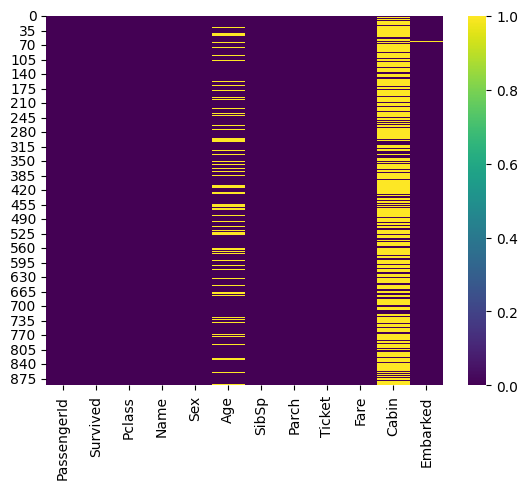

In [37]:
sns.heatmap(train.isnull(),cmap='viridis')

Analyse missing Cabin Values

In [38]:
missing_values = pd.isnull(train["Cabin"])
 
# Counting missing values in the "Team" column
missing_values_count = missing_values.sum()

print("missing values",missing_values_count)

#total_values = train["Age"].count()

total_values = len(train)

print("total values",total_values)

missing_age_percent = (missing_values_count / total_values) * 100

print("missing_age_percent",missing_age_percent)

missing values 687
total values 891
missing_age_percent 77.10437710437711


Analyse missing Age Values

In [39]:
missing_values = pd.isnull(train["Age"])
 
# Counting missing values in the "Team" column
missing_values_count = missing_values.sum()

print("missing values",missing_values_count)

#total_values = train["Age"].count()

total_values = len(train)

print("total values",total_values)

missing_age_percent = (missing_values_count / total_values) * 100

print("missing_age_percent",missing_age_percent)

missing values 177
total values 891
missing_age_percent 19.865319865319865


<b>Analyse Survival Data</b>

/var/folders/8_/wfp348kn2dq3bn994w75sqrm0000gp/T/ipykernel_94803/3813607065.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=train,palette='RdBu_r')


<Axes: xlabel='Survived', ylabel='count'>

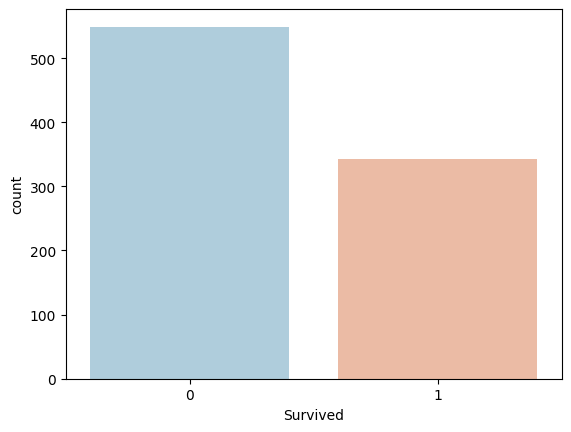

In [42]:
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

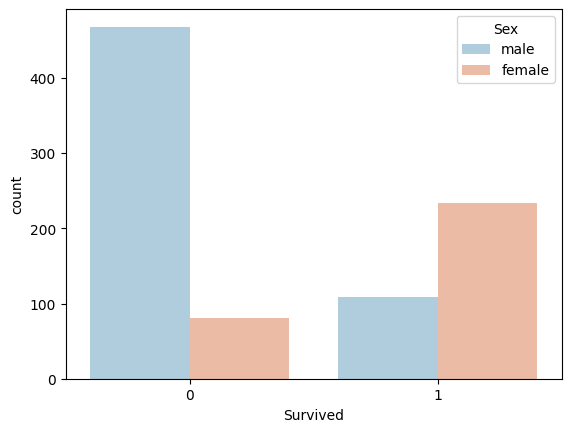

In [44]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')